# Midterm Project: Classification Analysis  
  
Author: Terry Konkin  
Date: April 6, 2025  
Objective: To analyze the Titanic dataset.

In [27]:

# all imports get moved to the top - import each only once
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


### Section 1. Import and Inspect the Data  

1.1 Load the dataset and display the first 10 rows

In [42]:
# load the dataset
titanic_train = pd.read_csv("data/train.csv", sep=",")

In [44]:
# display the first 10 rows
print(titanic_train.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

1.2 Check for missing values and display summary statistics

In [45]:
# Check for missing values
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
# Display summary statistics
print(titanic_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Display basic information about the datset
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Reflection 1: What do you notice about the dataset?  Are there any issues?  
  
The dataset has already been split into train & test sets.  
Age, Cabin, and Embark have missing values.

### Section 2. Data Exploration and Preparation

2.1 Explore Data Patterns and Distributions

Create histograms, boxplots and count plots for categorical variables (as applicable).

Histogram of age.

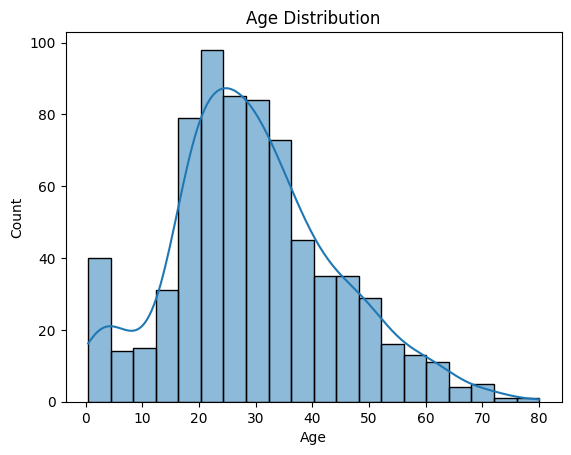

In [47]:
sns.histplot(titanic_train['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


Box plots for numeric columns.

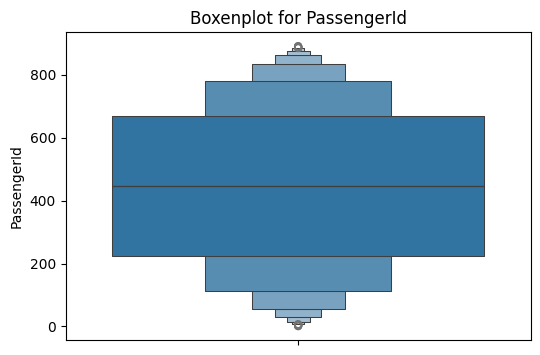

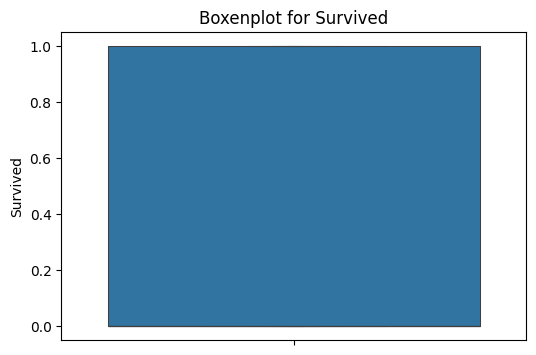

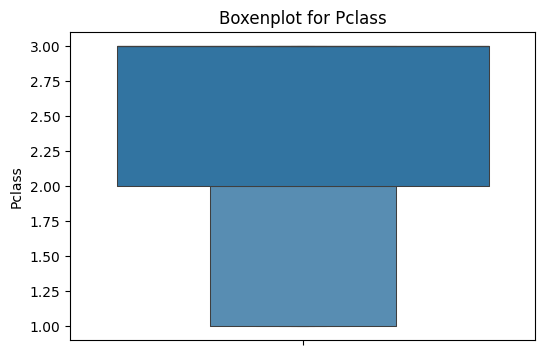

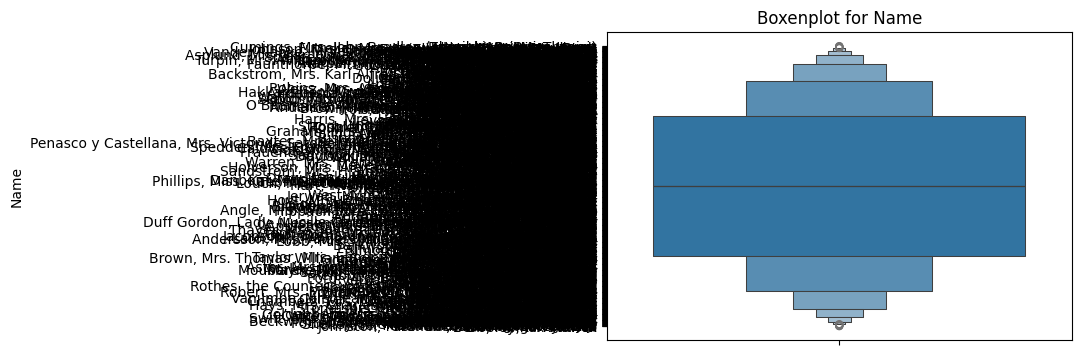

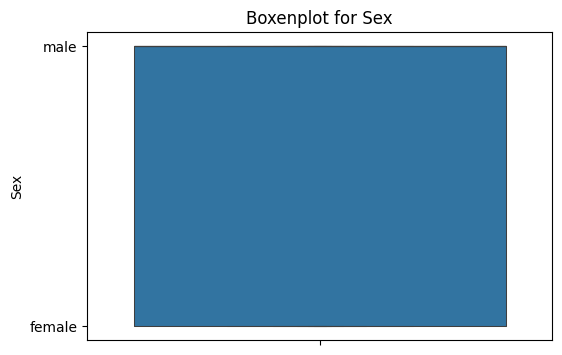

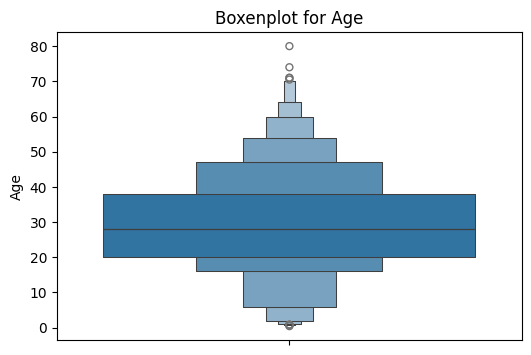

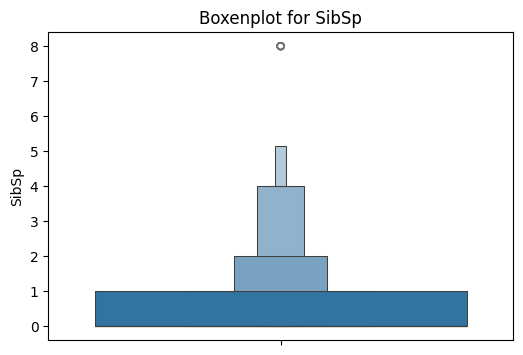

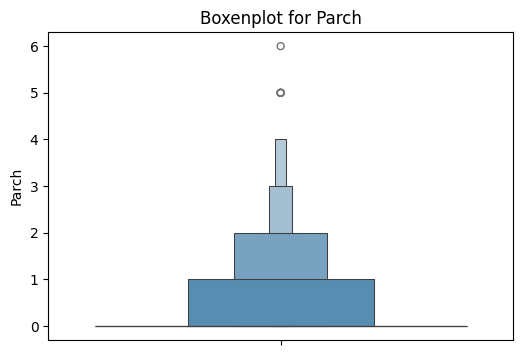

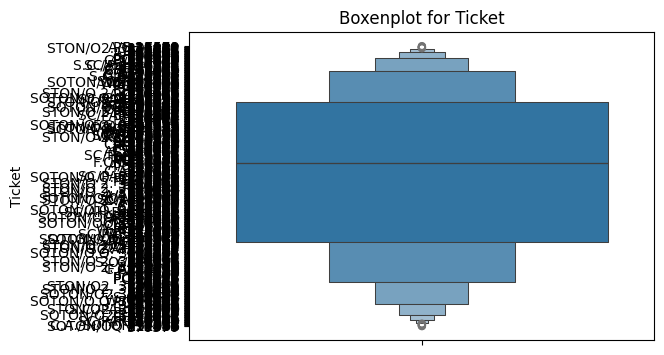

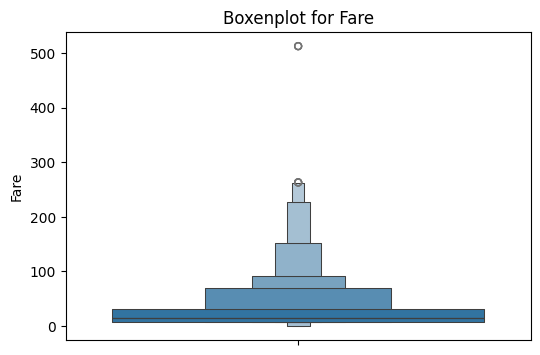

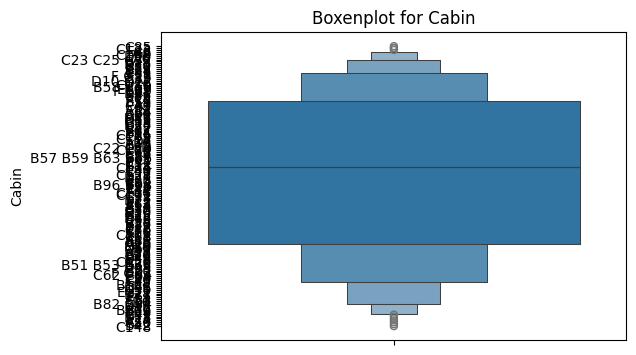

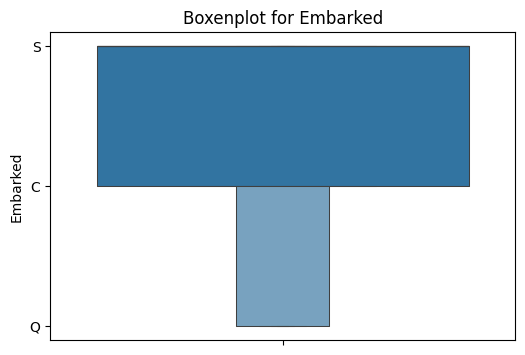

In [48]:
for column in titanic_train.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=titanic_train[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()


Count plot for class and survival.

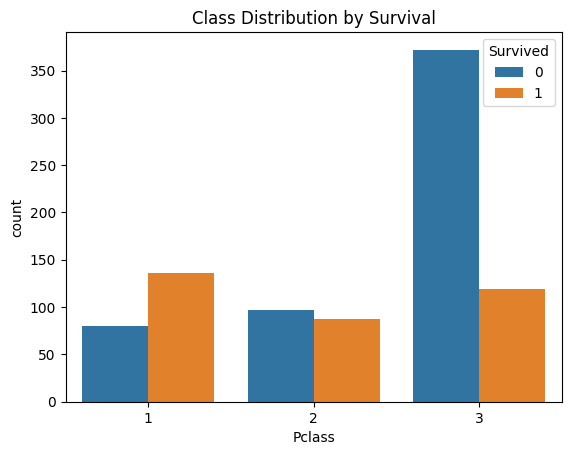

In [49]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_train)
plt.title('Class Distribution by Survival')
plt.show()


Identify patterns, outliers, and anomalies in feature distributions.

Creata a scatter matrix.

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='Pclass', ylabel='Fare'>],
       [<Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>]], dtype=object)

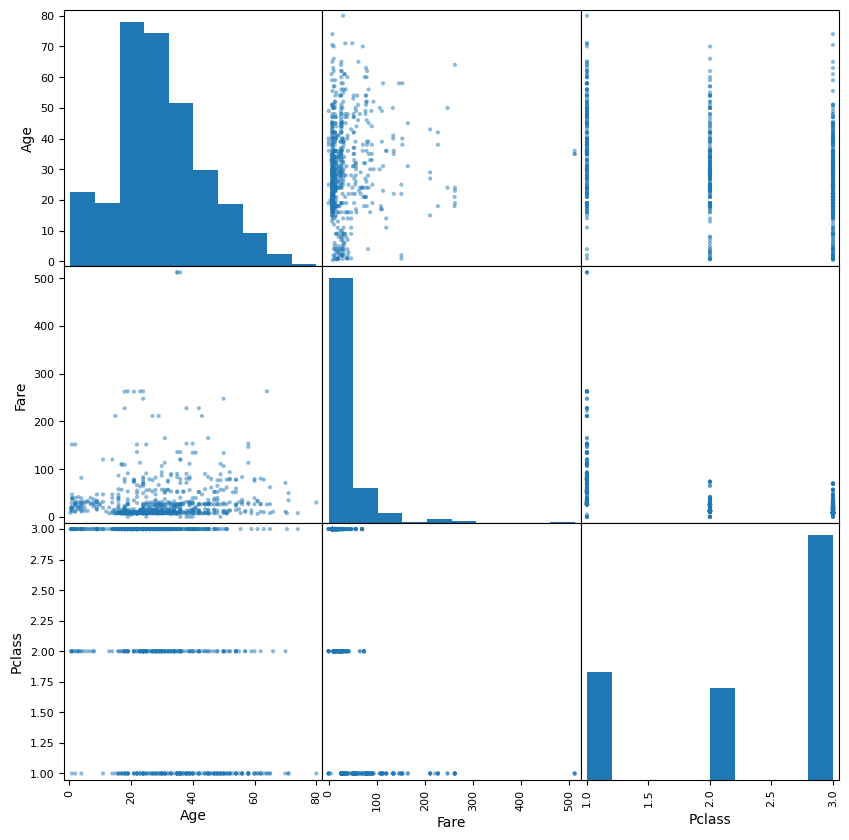

In [51]:
attributes = ['Age', 'Fare', 'Pclass']
scatter_matrix(titanic_train[attributes], figsize=(10, 10))


Check for class imbalance in the target variable (as applicable).  
Third class exhibited a much different survival rate than the other classes.

2.2 Handle missing values and clean data

Age was missing values.  We can input missing values for age, using the median.

In [53]:
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)


C:\Users\tkonk\AppData\Local\Temp\ipykernel_13664\3719051933.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)


Embark is missing values.  We can fill missing values with mode.

In [55]:
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)


C:\Users\tkonk\AppData\Local\Temp\ipykernel_13664\3479037821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)


Convert categorical data to numeric.

In [56]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})

2.3 Feature selection and engineering.

Convert categorical "Sex" to numeric.

In [57]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0, 'female': 1})

Reflection 2:  
What patterns or anomalies do you see? 
Thrid class had a higher fatality rate.  
 
Do any features stand out?  
There was a higher proportion of young children than older adults.  

What preprocessing steps were necessary to clean and improve the data? 
Addressed missing values in age.  

Did you create or modify any features to improve performance?  
Sex was modified to a number.